In [2]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *

In [ ]:
"""
mx_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
Tx_list = [5,10,20,40]
Rs_list = [3,8.35,8.5,8.65,14]
beta_list = [0,0.25,0.5,1]
"""

In [3]:
pathToFlux = '/Users/yenhsun/flux'
#flux_mx1.00e-01_Tx005_Rs3.00_beta0.00
#pathToFlux = '/Volumes/GoogleDrive/其他電腦/我的iMac/SNnuBDM_data/flux'

In [11]:
mx = 1e-2
Tx = 10
Rstar = [8.35,8.5,8.65]
beta = 0
flux_Rstar = []
for i in range(3):
    
    flux = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt',skiprows=1)
    #flux = np.loadtxt(pathToFlux + '/flux_mx1.00e-01_Tx005_Rs3.00_beta0.00.txt',skiprows=1)
    #print(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt')
    flux_Rstar.append(flux)
flux_Rstar = np.array(flux_Rstar)

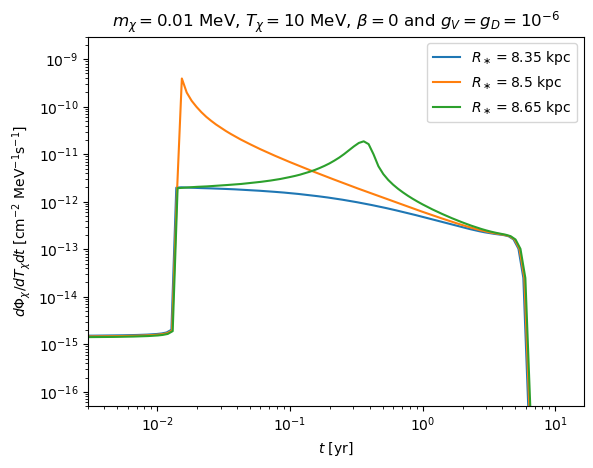

In [39]:
for i in range(3):
    plt.plot(flux_Rstar[i,:,0]/yr2s,flux_Rstar[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $\beta=0~{\rm and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-3,)
plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_Rs.pdf',bbox_inches='tight')

In [50]:
#mx = 1e-2
#Tx = 10
Rstar = 8.5
beta = [0,0.5,1]
flux_beta = []
for i in range(3):
    flux = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    #flux = np.loadtxt(pathToFlux + '/flux_mx1.00e-01_Tx005_Rs3.00_beta0.00.txt',skiprows=1)
    #print(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt')
    flux_beta.append(flux)
flux_beta = np.array(flux_beta)

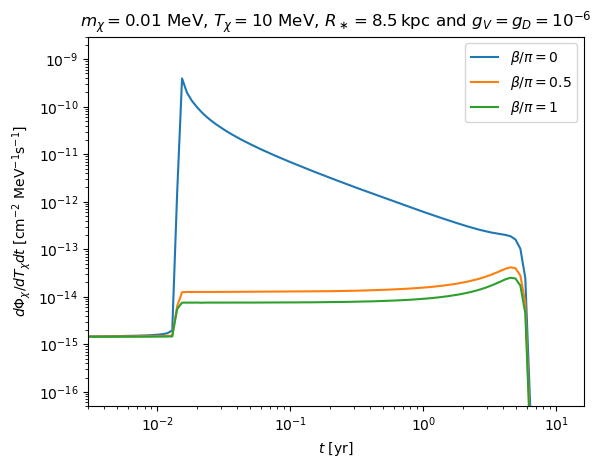

In [52]:
for i in range(3):
    plt.plot(flux_beta[i,:,0]/yr2s,flux_beta[i,:,1],label=r'$\beta/\pi = $'+str(beta[i]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $R_\ast=8.5\,{\rm kpc~and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-3,)
plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_beta.pdf',bbox_inches='tight')

In [53]:
from supernovaNuBoostedDM import get_tvan_thetaM

In [56]:
get_tvan_thetaM(100,0.1,8.5)

(218692807.55562103, 0.022334626923679872)

In [57]:
get_tvan_thetaM(5,0.1,8.5)

(4363521148.431735, 0.09772690735871903)